In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt
# gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print("device: gpu") if torch.cuda.is_available() else print("device: cpu")
# # print("device: gpu") if torch.cuda.is_

In [25]:
print(device)

cpu


In [26]:
# hypter parameter setting
learning_rate = 1e-1 # 0.1
epochs = 50
batch_size = 60000 # gradient descent
display_step = 10

act = nn.ReLU()

len(train_data):  60000
len(test_data):  10000
original data shape:  torch.Size([1, 28, 28])
label:  5


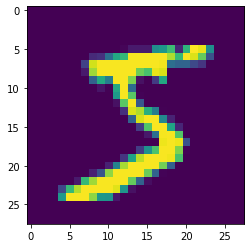

processed data shape: torch.Size([60000, 1, 28, 28])
label: tensor([1, 4, 9,  ..., 2, 1, 9])


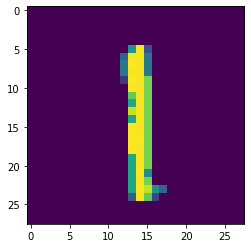

In [28]:
# load data  # 미니 배치를 쓰려면 데이터를 불러와야됨 로더를 통해 셔플해서 미니배치별 데이터를 가지고 오는 것임
train_data = dataset.MNIST("./", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
test_data = dataset.MNIST("./", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)


# check the data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

x_train, y_train = train_data[0]
print('original data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train[0])
plt.show()

# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 1000, shuffle = True, num_workers = 1, drop_last = True)

# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('processed data shape:', example_data.shape)
print('label:', example_target)

plt.figure()
plt.imshow(example_data[0][0])
plt.show()

In [29]:
model = nn.Sequential(
         nn.Linear(28*28,100),
         act,
         nn.Linear(100,60),
         act,
         nn.Linear(60,10) 
         )
         
model = model.to(device)
model.train()

# loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss_array = []
iteration_loss_array = []

# train the model
for epoch in range(epochs):
    for iteration, [data, label] in enumerate(train_loader):
        optimizer.zero_grad()
        
        x = data.to(device)
        x = x.view(batch_size, -1)
        y = label.to(device)
        
        output = model(x)

        loss = loss_function(output, y)
        loss.backward()
        optimizer.step()
        iteration_loss_array.append(loss.cpu().detach().numpy())
            
    loss_array.append(loss.cpu().detach().numpy())
    
    if epoch % 5 == 0:
        print("Epoch:", epoch + 1, "\Loss:", loss)

Epoch: 1 \Loss: tensor(2.3051, grad_fn=<NllLossBackward>)
Epoch: 6 \Loss: tensor(2.2917, grad_fn=<NllLossBackward>)
Epoch: 11 \Loss: tensor(2.2775, grad_fn=<NllLossBackward>)
Epoch: 16 \Loss: tensor(2.2595, grad_fn=<NllLossBackward>)
Epoch: 21 \Loss: tensor(2.2343, grad_fn=<NllLossBackward>)
Epoch: 26 \Loss: tensor(2.2009, grad_fn=<NllLossBackward>)
Epoch: 31 \Loss: tensor(2.1573, grad_fn=<NllLossBackward>)
Epoch: 36 \Loss: tensor(2.0998, grad_fn=<NllLossBackward>)
Epoch: 41 \Loss: tensor(2.0244, grad_fn=<NllLossBackward>)
Epoch: 46 \Loss: tensor(1.9272, grad_fn=<NllLossBackward>)


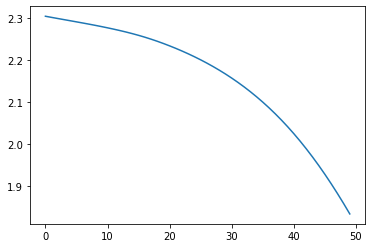

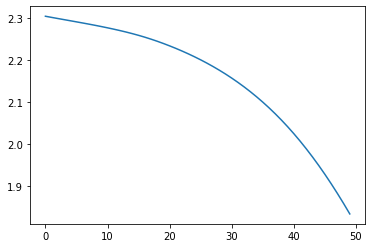

In [30]:
# plot losses
plt.figure()
plt.plot(loss_array)
plt.show()
# plot iteration losses
plt.figure()
plt.plot(iteration_loss_array)
plt.show()


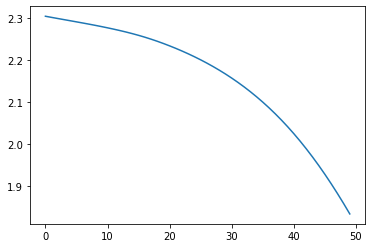

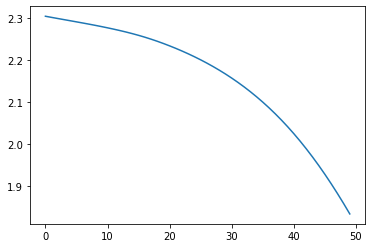

In [31]:
# plot losses
plt.figure()
plt.plot(loss_array)
plt.show()
# plot iteration losses
plt.figure()
plt.plot(iteration_loss_array)
plt.show()

In [32]:
# test
model.eval()
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 10000, shuffle = True, num_workers = 1, drop_last = True)
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for data, label in test_loader:
        x = data.to(device)
        x = x.view(-1, 784)
        y = label.to(device)
        
        prediction = model(x)
        _, prediction_index = torch.max(prediction, 1)
                
        prediction_list.append(prediction_index)
        label_list.append(y)
        
        total += y.size(0)
        correct += (prediction_index == y).sum().float()
        
print('total', total)
print('correct', correct)
print('accuracy', correct/total)

total 10000
correct tensor(6087.)
accuracy tensor(0.6087)


In [33]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
    
prediction_array = np.array(prediction_list[0].cpu())
label_array = np.array(label_list[0].cpu())

print("prediction :", prediction_array.shape)
print("true label :", label_array.shape)

confusion_matrix(
    label_array,
    prediction_array) # y_pred

prediction : (10000,)
true label : (10000,)


array([[ 955,    0,    1,   20,    0,    0,    2,    1,    1,    0],
       [   0, 1114,    0,    9,    0,    0,    4,    1,    7,    0],
       [ 253,   43,  299,  250,    7,    0,  134,   33,   11,    2],
       [  30,    6,    0,  936,    0,    0,    2,   33,    1,    2],
       [  30,   42,    0,    8,  399,    0,   18,  166,    3,  316],
       [  92,   35,    4,  587,   15,    0,   27,   88,   21,   23],
       [ 222,   29,    3,   21,    4,    0,  666,    4,    6,    3],
       [   6,   38,    2,    4,    1,    0,    2,  951,   17,    7],
       [  32,   29,    2,  462,    3,    0,   18,   44,  345,   39],
       [  27,   17,    1,   33,   23,    0,    1,  483,    2,  422]])

In [35]:
def init_weights(m): 
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)


# model
model = nn.Sequential(
        nn.Linear(np.prod(x_train.shape[1:]),300),
        act,
        nn.Linear(300,10),
        )

model.apply(init_weights)
model = model.to(device)
model.train()


# loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss_array = []
iteration_loss_array = []

# train the model
for epoch in range(epochs):
    for iteration, [data, label] in enumerate(train_loader):
        optimizer.zero_grad()
        
        x = data.to(device)
        x = x.view(batch_size, -1)
        y = label.to(device)
        
        output = model(x)

        loss = loss_function(output, y)
        loss.backward()
        optimizer.step()
        iteration_loss_array.append(loss.cpu().detach().numpy())
            
    loss_array.append(loss.cpu().detach().numpy())
    
    if epoch % 5 == 0:
        print("Epoch:", epoch + 1, "\Loss:", loss)

/home/piai/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch: 1 \Loss: tensor(2.4365, grad_fn=<NllLossBackward>)
Epoch: 6 \Loss: tensor(1.9233, grad_fn=<NllLossBackward>)
Epoch: 11 \Loss: tensor(1.5614, grad_fn=<NllLossBackward>)
Epoch: 16 \Loss: tensor(1.2847, grad_fn=<NllLossBackward>)
Epoch: 21 \Loss: tensor(1.0841, grad_fn=<NllLossBackward>)
Epoch: 26 \Loss: tensor(0.9413, grad_fn=<NllLossBackward>)
Epoch: 31 \Loss: tensor(0.8383, grad_fn=<NllLossBackward>)
Epoch: 36 \Loss: tensor(0.7619, grad_fn=<NllLossBackward>)
Epoch: 41 \Loss: tensor(0.7035, grad_fn=<NllLossBackward>)
Epoch: 46 \Loss: tensor(0.6575, grad_fn=<NllLossBackward>)
